# House Price Prediction

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("housing_new.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


## Data Cleaning

In [5]:
data=pd.get_dummies(data, columns=['ocean_proximity'])

In [6]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,False,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,False,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,False,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,False,True,False,False,False


In [7]:
data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,0.320831,-0.055337,0.009501,-0.474714,0.046185
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,-0.446928,0.351084,-0.016662,0.358785,-0.161342
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,0.045553,-0.236968,0.017105,0.256149,0.020797
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,-0.003777,0.026477,-0.007603,-0.023647,-0.008674
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.018314,-0.006463,-0.004361,-0.019873,0.000679
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,0.073450,-0.019602,-0.010451,-0.061480,-0.023498
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,0.041883,-0.038265,-0.009119,-0.011280,0.002106
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,0.168715,-0.237536,-0.009281,0.056677,0.027351
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,0.257614,-0.484787,0.023525,0.160526,0.140378
ocean_proximity_<1H OCEAN,0.320831,-0.446928,0.045553,-0.003777,0.018314,0.073450,0.041883,0.168715,0.257614,1.000000,-0.607778,-0.013928,-0.314721,-0.342018


## Data Visualisation

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

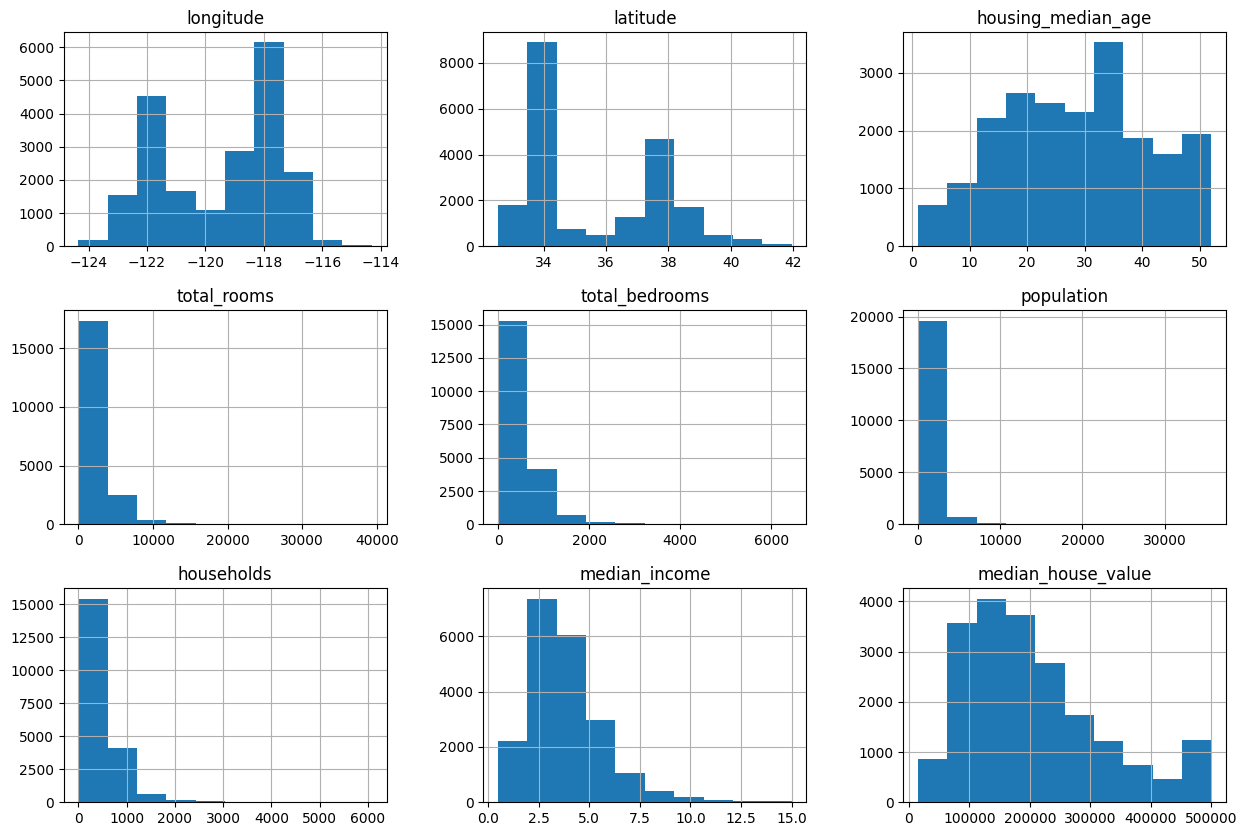

In [8]:
data.hist(figsize=(15,10))

<Axes: >

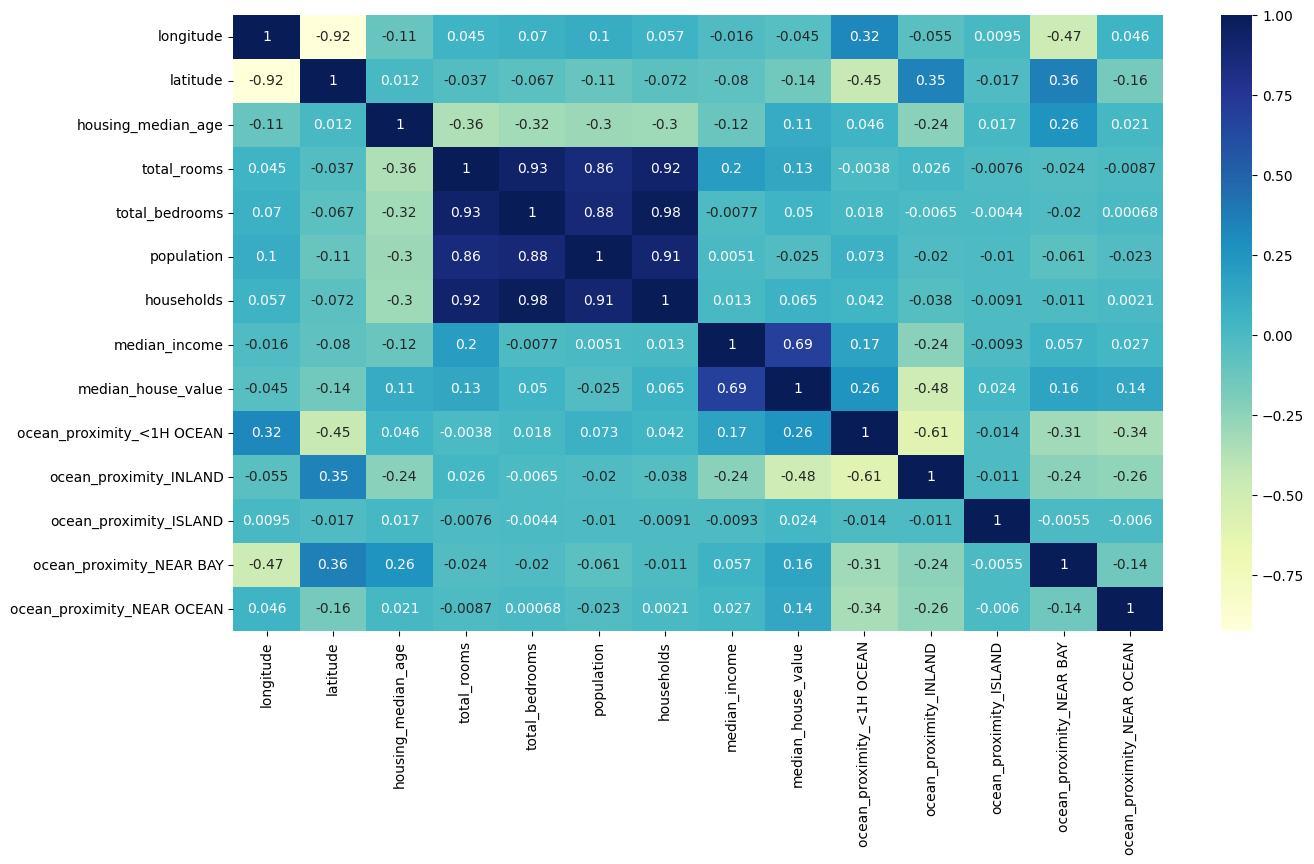

In [9]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True,cmap='YlGnBu')

## Skewed Data

In [10]:
data['total_rooms'] = np.log(data['total_rooms'] + 1)
data['total_bedrooms'] = np.log(data['total_bedrooms'] + 1)
data['population'] = np.log(data['population'] + 1)
data['households'] = np.log(data['households'] + 1)

data['bedroom_ratio']=data['total_bedrooms']/data['total_rooms']
data['household_rooms']=data['total_rooms']/data['households']

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'bedroom_ratio'}>,
        <Axes: title={'center': 'household_rooms'}>, <Axes: >]],
      dtype=object)

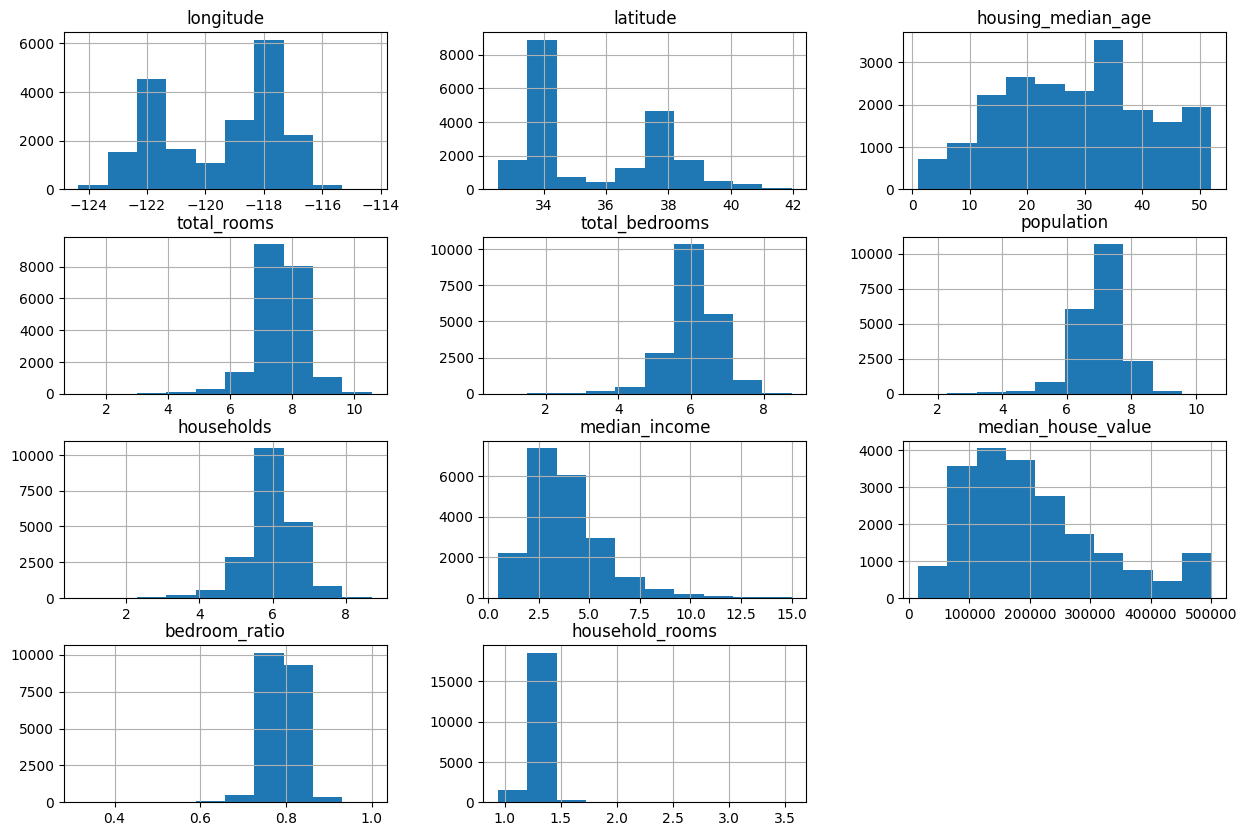

In [11]:
data.hist(figsize=(15,10))

<Axes: >

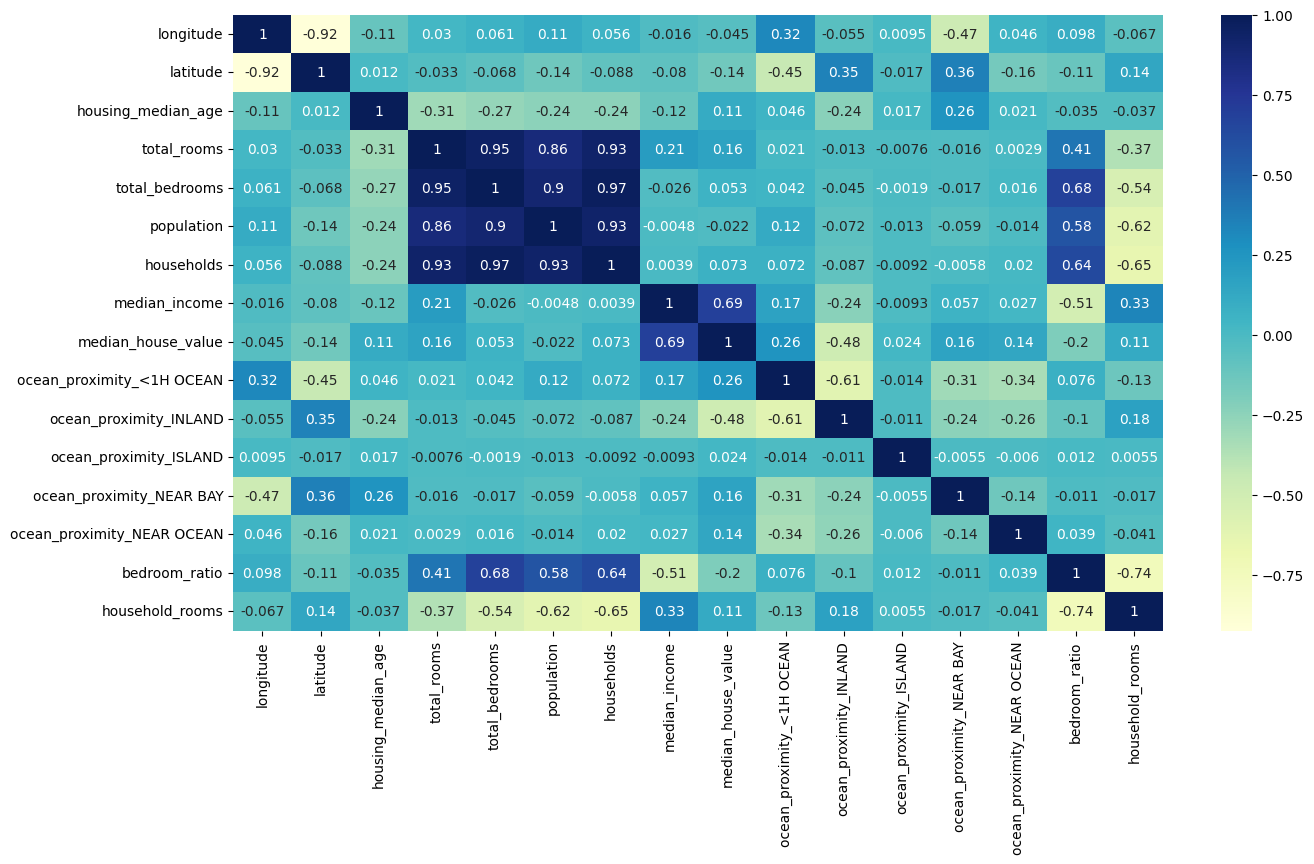

In [12]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True,cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

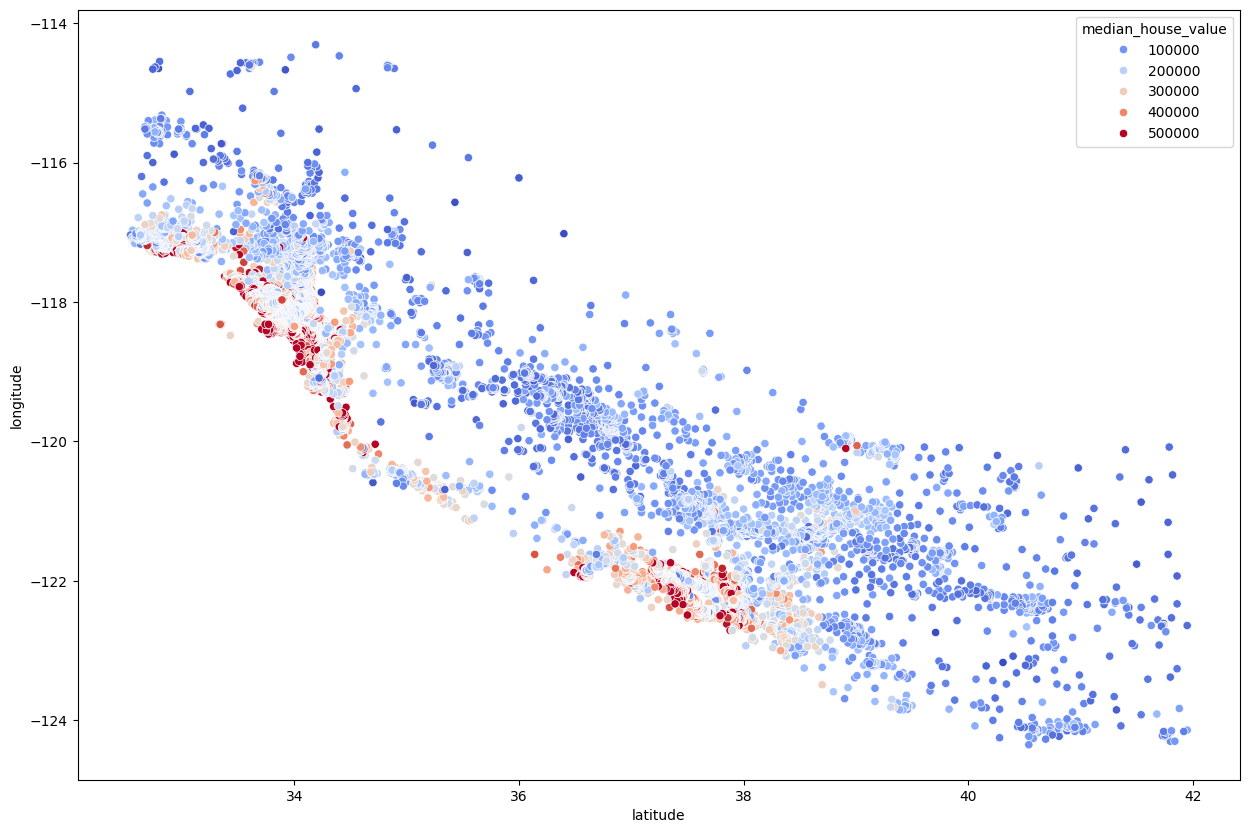

In [13]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="latitude",y="longitude",data=data,hue="median_house_value",palette="coolwarm")

## Data Splitting

In [14]:
from sklearn.model_selection import train_test_split

x=data.drop(['median_house_value'],axis=1)
y=data['median_house_value']

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [16]:
train_data=x_train.join(y_train)

In [17]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,bedroom_ratio,household_rooms,median_house_value
17942,-121.94,37.34,36.0,8.052933,6.450470,7.224753,6.329721,5.0175,True,False,False,False,False,0.801009,1.272241,246100.0
15182,-117.08,33.04,10.0,7.854769,5.852202,7.085064,5.902633,6.5300,True,False,False,False,False,0.745051,1.330723,264100.0
998,-121.80,37.69,17.0,8.283241,6.461468,7.706613,6.496775,5.4324,False,True,False,False,False,0.780065,1.274977,215500.0
18159,-122.03,37.36,28.0,7.820440,5.846439,6.855409,5.891644,6.4913,True,False,False,False,False,0.747584,1.327378,411900.0
7013,-118.07,33.97,36.0,7.143618,5.613128,6.959399,5.537334,4.8929,True,False,False,False,False,0.785754,1.290082,156200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4029,-118.54,34.18,17.0,8.883917,7.598399,8.318986,7.508787,3.0943,True,False,False,False,False,0.855298,1.183136,174500.0
16313,-121.33,38.01,36.0,7.232733,5.337538,6.276643,5.318120,5.9191,False,True,False,False,False,0.737970,1.360017,151900.0
18589,-122.14,37.08,18.0,7.791936,6.086775,7.153834,6.033086,5.2101,False,False,False,False,True,0.781163,1.291534,334000.0
14941,-117.04,32.63,26.0,7.921898,6.047372,7.062192,5.988961,5.1354,False,False,False,False,True,0.763374,1.322750,181600.0


# Model Training

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

x_train,y_train=train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']
x_train_s=scaler.fit_transform(x_train)
reg=LinearRegression()
reg.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
test_data=x_test.join(y_test)

In [20]:
x_test,y_test=test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']

In [21]:
test_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN', 'bedroom_ratio', 'household_rooms',
       'median_house_value'],
      dtype='object')

In [22]:
train_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN', 'bedroom_ratio', 'household_rooms',
       'median_house_value'],
      dtype='object')

## Model Score (Linear Regression)

In [23]:
reg.score(x_test, y_test)

0.6718468221239461

In [24]:
y_pred = reg.predict(x_test)

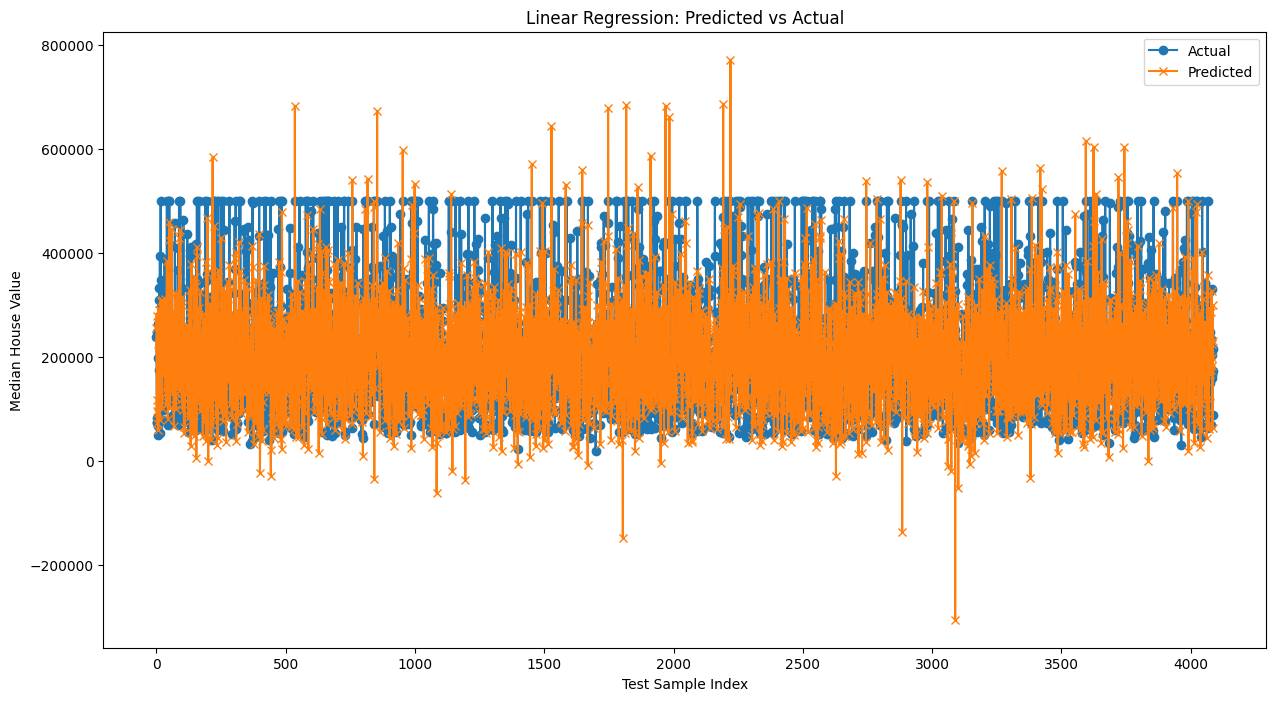

In [25]:
plt.figure(figsize=(15,8))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.xlabel("Test Sample Index")
plt.ylabel("Median House Value")
plt.title("Linear Regression: Predicted vs Actual")
plt.legend()
plt.show()


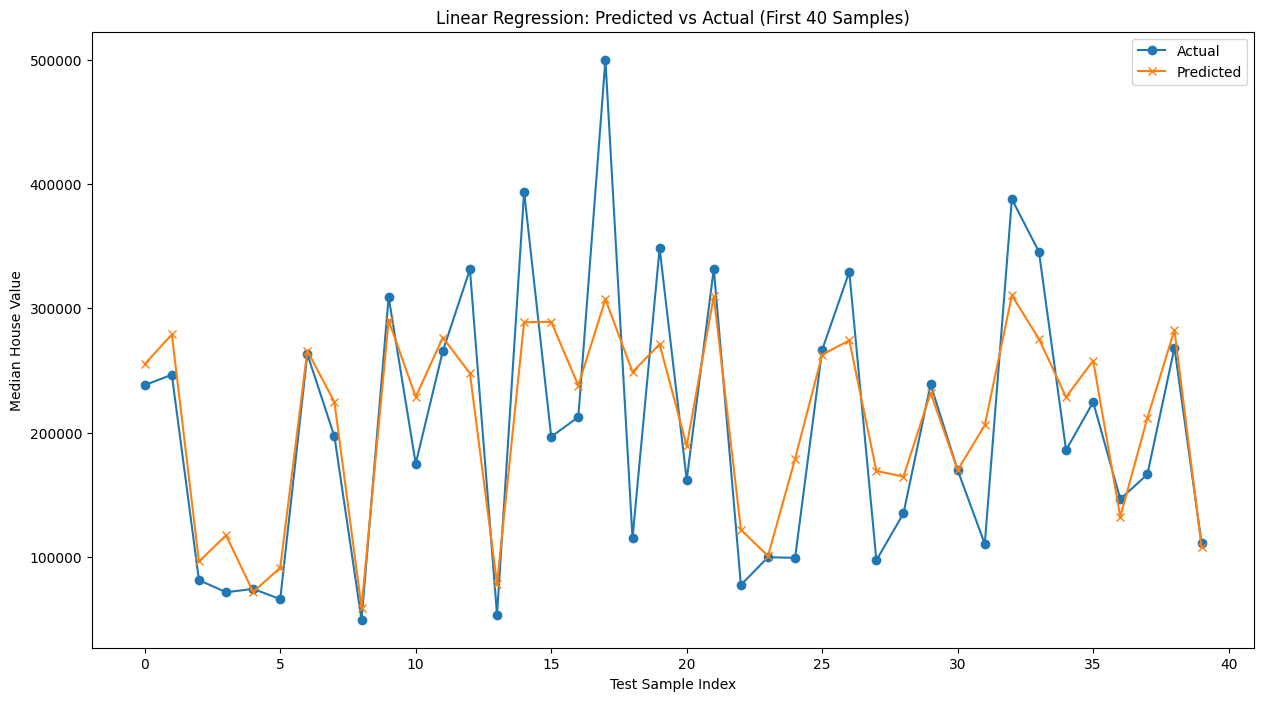

In [26]:
n = 40  # number of points to display
plt.figure(figsize=(15,8))
plt.plot(y_test.values[:n], label='Actual', marker='o')
plt.plot(y_pred[:n], label='Predicted', marker='x')
plt.xlabel("Test Sample Index")
plt.ylabel("Median House Value")
plt.title(f"Linear Regression: Predicted vs Actual (First {n} Samples)")
plt.legend()
plt.show()

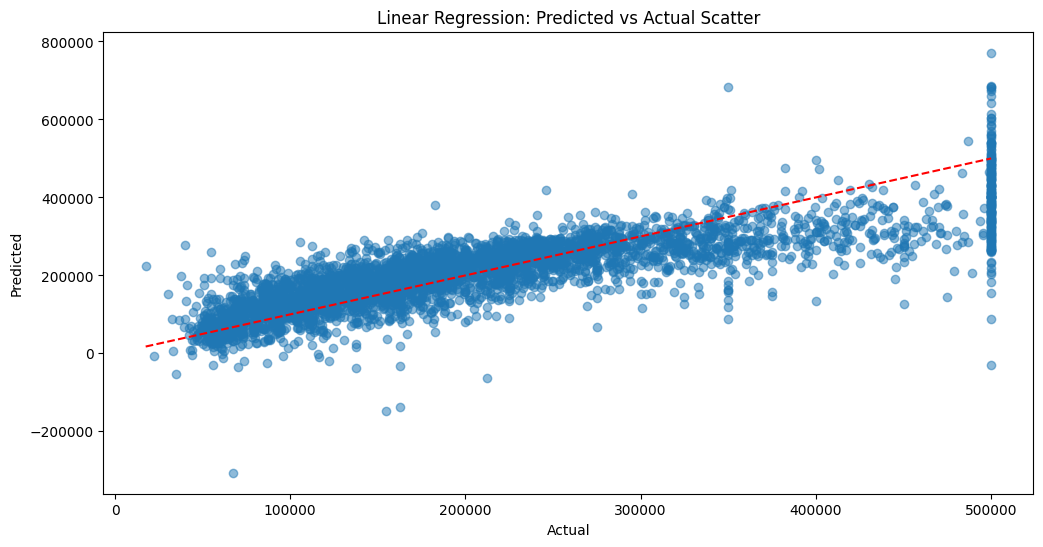

In [27]:
plt.figure(figsize=(12,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression: Predicted vs Actual Scatter")
plt.show()


In [28]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", r2)
print("MAE:", mae)
print("RMSE:", rmse)

R² Score: 0.6718468221239461
MAE: 48154.120456885
RMSE: 66662.0155116608


## Model (RandomForestRegressor)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(x_train,y_train)

In [ ]:
forest.score(x_test, y_test)

In [ ]:
y_pred_f = forest.predict(x_test)
mae = mean_absolute_error(y_test, y_pred_f)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_f))

print("MAE:", mae)
print("RMSE:", rmse)

In [ ]:
r2_score(y_test, y_pred_f)

In [ ]:
relative_mae = mae / y_test.mean()
print("Relative MAE:", relative_mae)


In [ ]:
relative_rmse = rmse / y_test.mean()
print("Relative RMSE:", relative_rmse)

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(y_test.values, label='Actual', marker='x')
plt.plot(y_pred_f, label='Predicted', marker='o')
plt.xlabel("Test Sample Index")
plt.ylabel("Median House Value")
plt.title("Forest Regression: Predicted vs Actual")
plt.legend()
plt.show()

In [ ]:
n = 40  # number of points to display
plt.figure(figsize=(15,8))
plt.plot(y_test.values[:n], label='Actual', marker='o')
plt.plot(y_pred_f[:n], label='Predicted', marker='x')
plt.xlabel("Test Sample Index")
plt.ylabel("Median House Value")
plt.title(f"Forest Regression: Predicted vs Actual (First {n} Samples)")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(y_test, y_pred_f, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect fit line
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Forest Regression: Predicted vs Actual Scatter")
plt.show()

In [ ]:
reg.score(x_train, y_train)

In [ ]:
forest.score(x_train, y_train)

In [ ]:
forest.score(x_test, y_test)

In [ ]:
reg.score(x_test, y_test)

In [ ]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(forest, f)


#                                                                THANK YOU!!